### Data Description:

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 

### Domain:
Banking

 

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (\\$1,000)
- ZIP Code: Home Address ZIP
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month (\\$1,000)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (\\$1,000)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?
 

### Learning Outcomes:
Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation
 

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

# 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import metrics

In [2]:
# import dataset
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv');
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# check data types
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
# check statistical summary
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [40]:
# check shape
data.shape

(5000, 14)

In [7]:
# check null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [33]:
# check incorrect imputation
# no null values, so no need to impute

# 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
1. Number of unique in each column?
1. Number of people with zero mortgage?
1. Number of people with zero credit card spending per month?
1. Value counts of all categorical columns.
1. Univariate and Bivariate
1. Get data model ready

In [41]:
# unique values
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [5]:
# no mortgage
data[data['Mortgage'] == 0].shape[0]

3462

In [6]:
# no credit card spending per month
data[data['CCAvg'] == 0].shape[0]

106

In [7]:
# value counts of all categorical columns
# data.value_counts
# data.apply(pd.Series.value_counts)
# data.loc[:, 'Personal Loan':].value_counts(normalize=True)

for col in data.loc[:, 'Personal Loan':]:
    print(data[col].value_counts(normalize=True))
    print()

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64



In [4]:
# univariate analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
data_si = data.drop(['ID'], axis=1) # data sans id
data_si.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


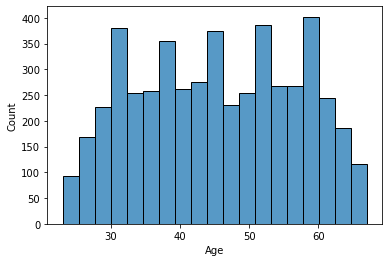

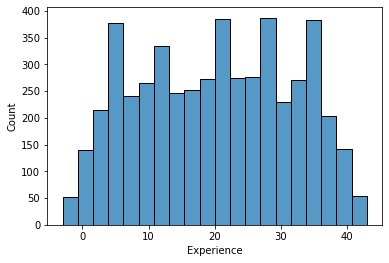

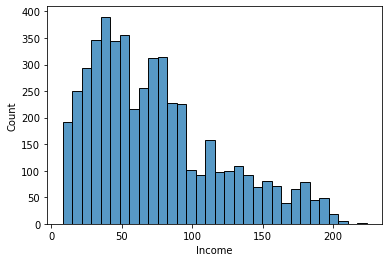

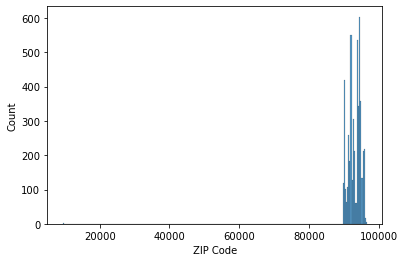

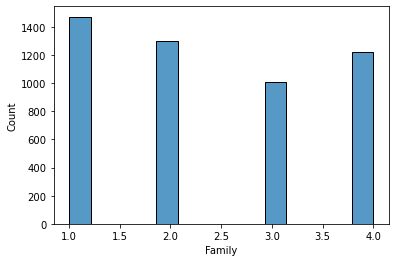

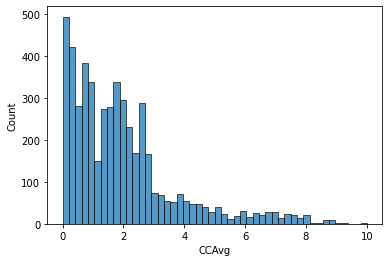

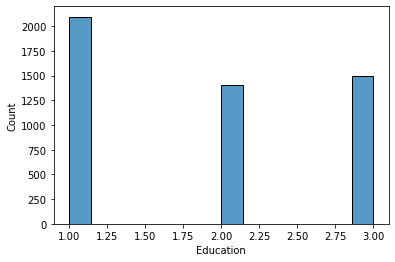

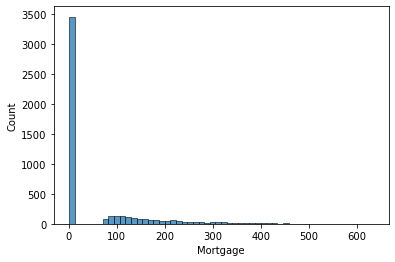

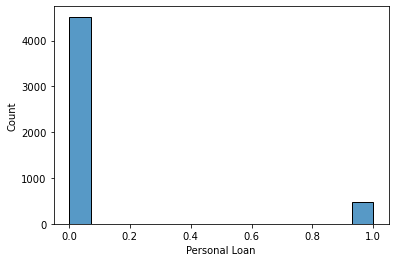

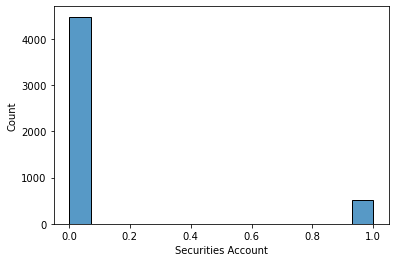

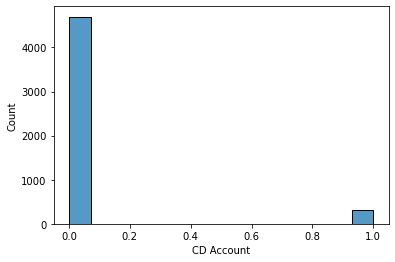

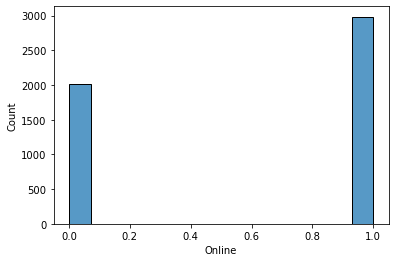

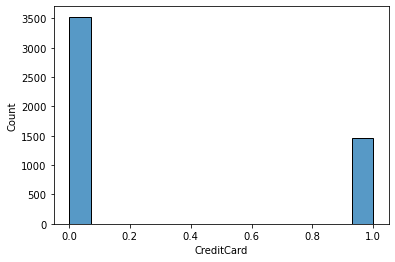

In [9]:
for col in data_si.columns:
    sns.histplot(data_si[col])
    plt.show()

In [95]:
# sns.histplot(data['ZIP Code'])
zip = pd.DataFrame(data_si['ZIP Code'])
zip_unique = pd.DataFrame(zip['ZIP Code'].unique())
zip_unique.rename(columns = {0:'Unique ZIP Codes'},  
            inplace = True) 
# zip_unique.columns['Unique ZIP Codes']
zip_unique.sort_values(by='Unique ZIP Codes',ascending=False)

,Unique ZIP Codes
276,96651
146,96150
457,96145
459,96094
312,96091
...,...
361,90011
248,90009
105,90007
282,90005


In [33]:
from mpl_toolkits.basemap import Basemap

(56,
 5,
 [-179.231086, -14.601813, 0.0, 0.0],
 [179.859681, 71.439786, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x7fa721826c70>)

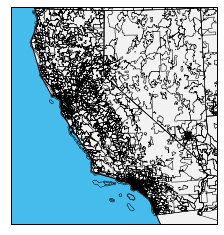

In [70]:
# m = Basemap()
# # m.readshapefile('basemap/shapefiles/states-and-equivalent/tl_2019_us_state', 'us')
# # m.us_info

westlimit=-125.
southlimit=32.
eastlimit=-113.
northlimit=42.

m = Basemap(
    llcrnrlon=westlimit,
    llcrnrlat=southlimit,
    urcrnrlon=eastlimit,
    urcrnrlat=northlimit,
    resolution='c',
    projection='lcc',
    lat_0=36.778259,
    lon_0=-119.417931
)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('basemap/shapefiles/zip-code-tabulation-areas/tl_2019_us_zcta510', 'zipcodes')
m.readshapefile('basemap/shapefiles/states-and-equivalent/tl_2019_us_state', 'states')
# # plt.gca().axis("off")
# # plt.show()

# df_poly = pd.DataFrame({
#         'shapes': [Polygon(np.array(shape), True) for shape in m.areas],
#         'area': [area['name'] for area in m.areas_info]
#     })
# df_poly = df_poly.merge(new_areas, on='area', how='left')


In [96]:
zip

,ZIP Code
0,91107
1,90089
2,94720
3,94112
4,91330
...,...
4995,92697
4996,92037
4997,93023
4998,90034


In [138]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True) # set simple_zipcode=False to use rich info database
# zipcode = search.by_zipcode("96651")
# zipcode
# if zipcode.major_city == None:
#     print('red wine, success')


# for z in zip_unique['Unique ZIP Codes']:
# #     print(zip)
#     zipcode = search.by_zipcode(z)
#     if zipcode.major_city == None:
#         print(z)
# 92717
# 9307
# 92634
# 96651

major_cities = []
for z in zip_unique['Unique ZIP Codes']:
    zipcode = search.by_zipcode(z)
    if zipcode.major_city != None:
        major_cities.append(zipcode.major_city)
        
# len(major_cities) #463

major_cities = pd.DataFrame(major_cities)
# major_cities.unique()
major_cities[0].unique()

array(['Pasadena', 'Los Angeles', 'Berkeley', 'San Francisco',
       'Northridge', 'San Diego', 'Claremont', 'Monterey', 'Ojai',
       'Redondo Beach', 'Santa Barbara', 'Belvedere Tiburon', 'Glendora',
       'Santa Clara', 'Capitola', 'Stanford', 'Studio City', 'Daly City',
       'Newbury Park', 'Arcata', 'Santa Cruz', 'Fremont', 'Richmond',
       'Mountain View', 'Huntington Beach', 'Sacramento', 'San Clemente',
       'Davis', 'Redwood City', 'Cupertino', 'Santa Clarita', 'Roseville',
       'Redlands', 'La Jolla', 'Brisbane', 'El Segundo', 'Los Altos',
       'Santa Monica', 'San Luis Obispo', 'Pleasant Hill',
       'Thousand Oaks', 'Rancho Cordova', 'San Jose', 'Reseda', 'Salinas',
       'Cardiff By The Sea', 'Oakland', 'San Rafael', 'Banning',
       'Bakersfield', 'Riverside', 'Rancho Cucamonga', 'Alameda',
       'Palo Alto', 'Livermore', 'Irvine', 'South San Francisco',
       'Emeryville', 'Ridgecrest', 'Hayward', 'San Gabriel', 'Santa Ana',
       'Loma Linda', 'Encini

In [111]:
# for idx, z in enumerate(zip['ZIP Code']):
#     if len(str(z)) < 5:
#         print(z)
#         print(idx)
        
# zip.iloc[384]
drop_index = []
for idx, z in enumerate(zip['ZIP Code']):
    if z == 92717 or z == 9307 or z == 92634 or z == 96651:
#         print(z)
        print(idx)
        drop_index.append(idx)

drop_index

106
172
184
321
366
384
468
476
630
672
695
721
780
1099
1189
1426
1483
1653
1752
1844
2049
2211
2218
2428
2486
2731
2957
3525
3887
4090
4276
4321
4384
4392


[106,
 172,
 184,
 321,
 366,
 384,
 468,
 476,
 630,
 672,
 695,
 721,
 780,
 1099,
 1189,
 1426,
 1483,
 1653,
 1752,
 1844,
 2049,
 2211,
 2218,
 2428,
 2486,
 2731,
 2957,
 3525,
 3887,
 4090,
 4276,
 4321,
 4384,
 4392]

In [109]:
# drop_index = zip[zip['ZIP Code'] == 92717].index 
# drop_index

Int64Index([ 106,  172,  184,  321,  366,  476,  695,  721, 1099, 1189, 1483,
            1752, 1844, 2049, 2211, 2428, 2486, 2957, 4090, 4276, 4321, 4384],
           dtype='int64')

In [10]:
# bivariate analysis
# data_si.groupby(['Personal Loan']).mean()
# analysing without Securities Account, CD Account, Online, CreditCard columns as it gives averages of 0 and 1. 
data_si.loc[:,'Age':'Personal Loan'].groupby(['Personal Loan']).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage
Personal Loan,,,,,,,,
0,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833


In [11]:
# data_si.groupby(['Personal Loan']).median()
# analysing without Securities Account, CD Account, Online, CreditCard columns
data_si.loc[:,'Age':'Personal Loan'].groupby(['Personal Loan']).median()
# most significant factors seems to be income and average credit card use

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage
Personal Loan,,,,,,,,
0,45.0,20.0,59.0,93437.0,2.0,1.4,2.0,0.0
1,45.0,20.0,142.5,93407.0,3.0,3.8,2.0,0.0


In [12]:
pd.crosstab(data_si['CreditCard'],data_si['Personal Loan'],normalize='columns')
# whether customers had a credit card or not did not seem to impact their likelihood of getting a loan

Personal Loan,0,1
CreditCard,,
0,0.706416,0.702083
1,0.293584,0.297917


In [13]:
pd.crosstab(data_si['Education'],data_si['Personal Loan'],normalize='columns')
# customers with an undergraduate degree seemed to not get a personal loan, vs those with higher degrees

Personal Loan,0,1
Education,,
1,0.443142,0.193750
2,0.270133,0.379167
3,0.286726,0.427083


In [117]:
data_si.shape

(5000, 13)

In [118]:
data_si.drop(drop_index, inplace=True)
data_si.shape

(4966, 13)

In [119]:
# get data model ready
X = data_si.drop('Personal Loan', axis=1)
y = data_si['Personal Loan']

# 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=88)

# 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [121]:
loreg_model = LogisticRegression(solver='liblinear',random_state=20210113)
# solver - algorithm used in optimization problem; liblinear used for small dataset
# random_state - used with solver=liblinear to shuffle data
loreg_model.fit(X_train, y_train)
y_predict = loreg_model.predict(X_test)

In [122]:
# training accuracy
train_score = loreg_model.score(X_test, y_test)
train_score

0.9147651006711409

In [123]:
# test accuracy
test_score = loreg_model.score(X_train, y_train)
test_score

0.9053509781357882

In [124]:
# recall score
metrics.recall_score(y_test,y_predict)

0.3769230769230769

In [125]:
# precision
metrics.precision_score(y_test, y_predict)

0.5157894736842106

In [126]:
# f1 score
metrics.f1_score(y_test,y_predict)

0.4355555555555556

In [127]:
# roc auc score
metrics.roc_auc_score(y_test,y_predict)

0.6715497737556562

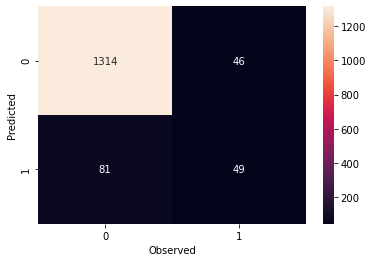

In [128]:
# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict)
conf_mat
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.show()

# 5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [129]:
# Coefficients
coef = pd.DataFrame()
coef['Columns'] = X_train.columns
coef['Coefficients'] = np.round(abs(loreg_model.coef_[0]),2)
coef.sort_values(by='Coefficients',ascending=False)

,Columns,Coefficients
2,Income,0.04
6,Education,0.02
0,Age,0.01
1,Experience,0.01
4,Family,0.01
5,CCAvg,0.01
3,ZIP Code,0.00
7,Mortgage,0.00
8,Securities Account,0.00
9,CD Account,0.00


In [130]:
# Predicted class is not equal to the observed class
data_ovp = X_test.copy() # data observed vs predicted
data_ovp['Observed Personal Loan'] = y_test
data_ovp['Predicted Personal Loan'] = y_predict
data_ovp[data_ovp['Observed Personal Loan'] != data_ovp['Predicted Personal Loan']]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Observed Personal Loan,Predicted Personal Loan
526,26,2,205,93106,1,6.33,1,271,0,0,0,1,0,1
2455,34,8,164,94720,4,7.40,3,0,0,0,1,0,1,0
1704,46,22,198,95521,2,6.67,1,0,0,0,0,1,0,1
1225,30,6,118,94534,2,2.80,2,0,0,0,0,0,1,0
2262,55,29,131,95070,2,0.70,2,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,29,5,160,90405,1,4.30,1,385,0,0,1,0,0,1
1524,40,16,155,94002,4,0.10,3,0,0,1,1,1,1,0
3012,29,3,172,92373,2,4.50,1,415,0,0,1,0,0,1
3458,48,23,191,95053,2,2.80,1,231,0,0,0,1,0,1


# 6. Give conclusion related to the Business understanding of your model? (5 marks)

### Confusion Matrix Definitions

**True Positive**: Model predicted that the customer would purchase a personal loan, and the customer had purchased a personal loan. 

**False Positive**: Model predicted that the customer would purchase a personal loan, but the customer had *not* purchased a personal loan. 

**False Negative**: Model predicted that the customer would *not* purchase a personal loan, and the customer had purchased a personal loan. 

**True Negative**: Model predicted that the customer would *not* purchase a personal loan, and the customer had in fact *not* purchased a personal loan. 

### Significant Data Points

CD Account (3.56), Education (1.79), and Credit Card (1.13) were the top three most significant data points as they had the largest coefficients, which means they had the largest impact on the model's output. 

Income, which one may have assumed to be one the most significant data point, was in fact one of the least significant as it had a coeffcient of 0.5. CCAvg beat Income in terms of least significance with a coeffcient of 0.10. Mortage was the least significant data point. It had a 0 coeffcient, meaning it had absolutely no influence on the model's output. These three coming in last was surprising, and almost counter-intuitive, as one would assume how much money a customer makes, whether they own a home, and how much they spend would be good indicators of whether they would get a personal loan.

### Most Important Metric

In this case study, the bank is looking to devise campaigns with better target marketing with the goal of converting liability customers to personal loan customers. As such, the opportunity cost of giving a loan to a customer that does not deserve a loan is greater than the opportunity cost of not giving a loan to a customer that does deserve a loan. Simply put, the bank would lose more money than it gained, if it gave a loan to someone that does not pay it back, as opposed to not giving a loan to a customer that would pay it back. 

the key point here is 'minimal budget'. the bnk wants to create a marketing campaign and know which customers to target. it needs to get the most out of it's budget and target only those customer that are more likely to buy a loan, vs spending time and money, resource, on trying to sell a loan to a customer that is not likely to purchase a loan. 